# model_v4

En el "model_v4", se entrena una red neuronal por medio de __Transfer Learning__.

Red neuronal base: 'concat'.

Con epoch: 5 > __Recall__: 71,2%

In [1]:
# Funciones
# ================================================================================================================================
import os, sys
sys.path.insert(1, r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Entregas\utils')
from funciones import procesamiento_de_datos_X, procesamiento_de_datos_y, define_x_y
from funciones import plot_cm, metricas, plot_roc_curve

# Tratamiento de datos
# ==============================================================================
import os
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Tratamiento de imágenes
# ==============================================================================
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras.models import Sequential

# Evaluación del modelo
# ==============================================================================
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# 1. Procesamiento de datos
==================================================================================================

In [2]:
path_train = '../data/processed/train'
path_val = '../data/processed/val'
path_test = '../data/processed/test'
tipos = os.listdir(path_train)

In [3]:
# Definimos variables
X_train, y_train = define_x_y(path_train)
X_val, y_val = define_x_y(path_val)
X_test, y_test = define_x_y(path_test)

In [4]:
# Procesamiento de datos
X_train, X_val, X_test = procesamiento_de_datos_X(X_train, X_val, X_test)
y_train, y_val, y_test = procesamiento_de_datos_y(y_train, y_val, y_test)

# 2. Definición del modelo
==================================================================================================

## Transfer Learning

Vamos a utilizar como capa de entrada una red neuronal ya entrenada previamente por expertos, disponibles al público en __[TensorFlow Hub](https://tfhub.dev/)__, y exclusivamente relacionados con diagnóstico de enfermedades en plantas.

In [15]:
# TRANSFER LEARNING: Vamos a utilizar como primeras capas una red neuronal ya entrenada previamente por expertos

model = Sequential(
    [hub.KerasLayer("https://tfhub.dev/google/cropnet/feature_vector/concat/1",
                   trainable=False),
    tf.keras.layers.Dense(len(tipos), activation='softmax')
    ])

In [16]:
# define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 3. Entrenamiento del modelo
==================================================================================================

In [17]:
# fit the model
model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=128, 
                    verbose=2, 
                    # class_weight=class_weights
                    )

Epoch 1/5
27/27 - 66s - loss: 53.7400 - accuracy: 0.4645 - 66s/epoch - 2s/step
Epoch 2/5
27/27 - 59s - loss: 18.8909 - accuracy: 0.5806 - 59s/epoch - 2s/step
Epoch 3/5
27/27 - 63s - loss: 11.2255 - accuracy: 0.6676 - 63s/epoch - 2s/step
Epoch 4/5
27/27 - 62s - loss: 11.6933 - accuracy: 0.7025 - 62s/epoch - 2s/step
Epoch 5/5
27/27 - 65s - loss: 8.3894 - accuracy: 0.7210 - 65s/epoch - 2s/step


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              15581216  
                                                                 
 dense (Dense)               (None, 4)                 5124      
                                                                 
Total params: 15,586,340
Trainable params: 5,124
Non-trainable params: 15,581,216
_________________________________________________________________


### Guardamos el modelo

In [22]:
# Vamos a guardar nuestro modelo
if '../model/model_v4' not in os.listdir():
    model.save('../model/model_v4')

INFO:tensorflow:Assets written to: model_v6\assets


INFO:tensorflow:Assets written to: model_v6\assets


In [5]:
# Lo podemos llamar cuando queramos
reconstructed_model = keras.models.load_model('../model/model_v4')

# 4. Evaluación del modelo
==================================================================================================

In [6]:
metricas(y_test, reconstructed_model.predict(X_test))

Accuracy: 0.712
Precision: 0.703
Recall: 0.712


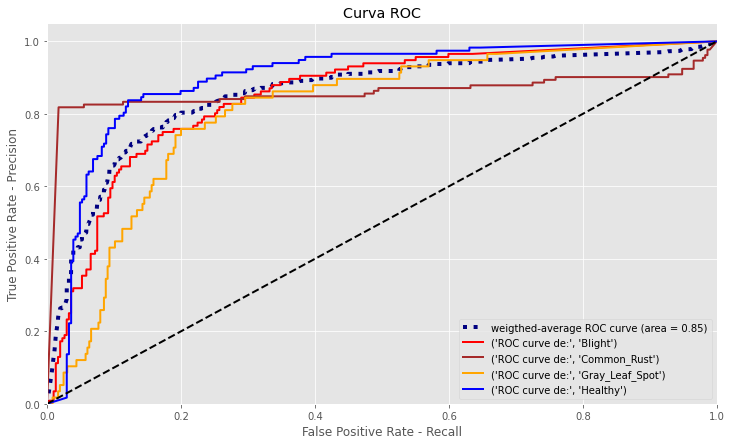

In [7]:
plot_roc_curve(y_test, reconstructed_model.predict(X_test))

In [8]:
# De un vistazo, matriz de confusión
cm = confusion_matrix(y_test, np.argmax(reconstructed_model.predict(X_test), axis=1))
cm_dec = [ cm[i] / np.sum(cm[i]) for i in range(len(cm))]
cm_per = [ [ str(round(x*100,1))+"%" for x in my_list] for my_list in cm_dec ]
cm_per

[['74.1%', '1.7%', '11.2%', '12.9%'],
 ['3.8%', '81.8%', '3.8%', '10.6%'],
 ['60.3%', '5.2%', '19.0%', '15.5%'],
 ['12.8%', '2.6%', '2.6%', '82.1%']]

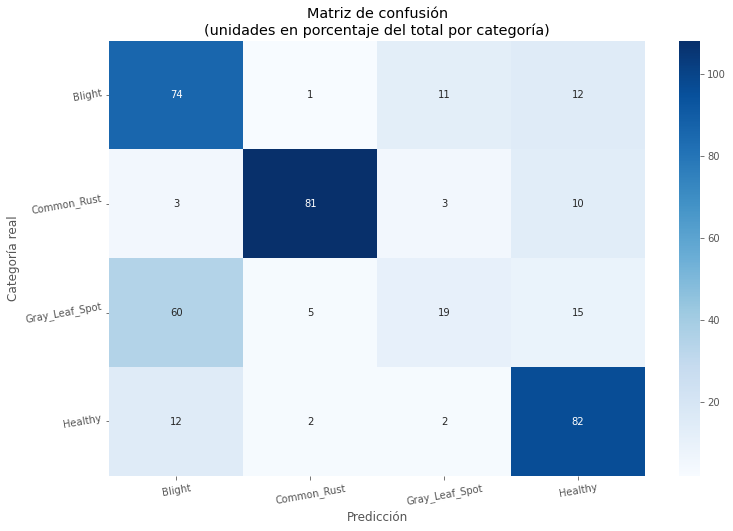

In [9]:
plot_cm(y_test, np.argmax(reconstructed_model.predict(X_test),axis=1))